In [1]:
from PIL import Image as pil
import numpy as np
from IPython.core.debugger import set_trace

In [2]:
pil_im = pil.open('./chinese_cropped/4.jpg')
print('The size of the image is ', pil_im.size)

The size of the image is  (463, 462)


In [3]:
# pil_im.thumbnail((80,80))
pil_im = pil_im.resize((80,80), pil.ANTIALIAS)


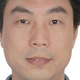

In [4]:
pil_im

In [60]:
np.array(pil_im).shape

(80, 80, 3)

In [14]:
np.array(list(pil_im.getdata())).shape

(6400, 3)

In [26]:
pil_im = pil.open('./japanese_cropped/1.jpg')
print('The size of the image is ', pil_im.size)

The size of the image is  (90, 90)


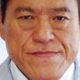

In [28]:
pil_im.thumbnail((80,80))
pil_im

In [29]:
np.array(pil_im).shape

(80, 80, 3)

In [123]:
pil_im = pil.open('./korean_cropped/95.jpg')
print('The size of the image is ', pil_im.size)

The size of the image is  (51, 52)


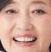

In [124]:
pil_im

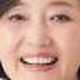

In [121]:
# pil_im.thumbnail((80,80))
pil_im = pil_im.resize((80,80), pil.ANTIALIAS)
pil_im

In [122]:
np.array(pil_im).shape

(80, 80, 3)

In [119]:
def imgSize(country_fname, numImg):
    '''
    input : fname 1~300.jpg
    return : np.array of country 
    '''
    minH = 1000
    
    for i in range(numImg):
        pil_im = pil.open('./'+ country_fname +'/' + str(i+1)+ '.jpg')
#         print('The size of the image is ', pil_im.size)
#         pil_im = pil_im.resize((80,80), pil.ANTIALIAS)
        if minH > pil_im.size[0] or minH > pil_im.size[1] :
            print(country_fname, i+1)
            minH = pil_im.size[0] if pil_im.size[0] <= pil_im.size[1] else pil_im.size[1]
    return minH

imgSize('chinese_cropped',300), imgSize('japanese_cropped',241), imgSize('korean_cropped',241) 
        

chinese_cropped 1
chinese_cropped 11
chinese_cropped 14
chinese_cropped 190
japanese_cropped 1
japanese_cropped 5
japanese_cropped 43
korean_cropped 1
korean_cropped 4
korean_cropped 6
korean_cropped 95


(129, 62, 51)

In [77]:
def img2array(country, country_fname, numImg):
    '''
    input : fname 1~300.jpg
    return : np.array of country 
    '''
    for i in range(numImg):
        pil_im = pil.open('./'+ country_fname +'/' + str(i+1)+ '.jpg')
#         print('The size of the image is ', pil_im.size)
        pil_im = pil_im.resize((80,80), pil.ANTIALIAS)
#         print(np.array(pil_im).shape)
        country = np.vstack((country, np.array(pil_im)[np.newaxis,]))
    
#     set_trace()
    
    country = country[1:,]
    country = np.transpose(np.array(country), axes = (0,3,1,2))
    print('The shape of country array is ' , country.shape)
    
    return country

In [88]:
china = np.random.randint(low=1,high=2,size=(1,80,80,3))

china = img2array(china, 'chinese_cropped',300)
china

The shape of country array is  (300, 3, 80, 80)


array([[[[ 54,  49,  49, ..., 211, 152, 105],
         [ 49,  49,  47, ..., 217, 162, 101],
         [ 45,  49,  49, ..., 226, 179, 112],
         ...,
         [ 44,  44,  45, ...,  77,  72,  67],
         [ 42,  44,  41, ...,  68,  68,  63],
         [ 42,  41,  38, ...,  64,  64,  60]],

        [[ 42,  38,  37, ..., 155, 106,  71],
         [ 38,  38,  36, ..., 159, 113,  66],
         [ 33,  38,  39, ..., 165, 128,  75],
         ...,
         [ 42,  42,  43, ...,  72,  68,  64],
         [ 40,  42,  39, ...,  64,  65,  60],
         [ 40,  39,  36, ...,  61,  61,  57]],

        [[ 42,  36,  32, ..., 130,  87,  63],
         [ 38,  35,  31, ..., 133,  93,  56],
         [ 33,  35,  34, ..., 136, 106,  63],
         ...,
         [ 55,  56,  57, ..., 102,  91,  83],
         [ 54,  56,  53, ...,  87,  86,  82],
         [ 54,  52,  50, ...,  81,  83,  79]]],


       [[[ 92, 111, 139, ..., 200, 176, 148],
         [ 94, 115, 147, ..., 206, 177, 165],
         [110, 143, 154, ..., 

In [102]:
np.savetxt('china.txt', china.flatten(), fmt='%d')
china2 = np.loadtxt('china.txt', dtype=int)
assert np.all(china == china2.reshape(300,3,80,80))

In [136]:
japan = np.random.randint(low=1,high=2,size=(1,80,80,3))

japan = img2array(japan, 'japanese_cropped',241)
japan

The shape of country array is  (241, 3, 80, 80)


array([[[[ 74,  31,  17, ..., 110,  96,  92],
         [ 70,  36,  27, ..., 121,  99,  93],
         [ 68,  38,  33, ..., 134,  95,  84],
         ...,
         [171, 175, 176, ..., 195, 204, 203],
         [179, 175, 171, ..., 198, 207, 208],
         [181, 175, 170, ..., 198, 207, 208]],

        [[ 61,  20,   9, ...,  85,  70,  67],
         [ 57,  26,  20, ...,  96,  73,  68],
         [ 52,  26,  27, ..., 109,  69,  59],
         ...,
         [176, 179, 180, ..., 210, 220, 221],
         [183, 179, 175, ..., 214, 223, 225],
         [186, 179, 174, ..., 214, 223, 226]],

        [[ 68,  30,  23, ...,  81,  71,  71],
         [ 64,  35,  34, ...,  92,  72,  71],
         [ 59,  34,  38, ..., 105,  67,  61],
         ...,
         [184, 188, 189, ..., 225, 235, 235],
         [192, 188, 186, ..., 229, 238, 240],
         [196, 190, 185, ..., 229, 238, 240]]],


       [[[ 21,  22,  20, ...,  39,  46,  47],
         [ 29,  29,  26, ...,  48,  55,  51],
         [ 27,  27,  24, ..., 

In [137]:
np.savetxt('japan.txt', japan.flatten(), fmt='%d')
japan2 = np.loadtxt('japan.txt', dtype=int)
assert np.all(japan == japan2.reshape(241,3,80,80))

In [140]:
kor = np.random.randint(low=1,high=2,size=(1,80,80,3))

kor = img2array(kor, 'korean_cropped',272)
kor

The shape of country array is  (272, 3, 80, 80)


array([[[[ 13,  10,  21, ...,  26,  18,  11],
         [ 12,  20,  30, ...,  30,  18,  12],
         [ 16,  31,  37, ...,  34,  21,  15],
         ...,
         [253, 244, 144, ..., 255, 252, 253],
         [253, 251, 197, ..., 254, 254, 254],
         [254, 255, 217, ..., 254, 255, 254]],

        [[ 13,   9,  19, ...,  17,  12,   7],
         [ 12,  19,  27, ...,  21,  12,   8],
         [ 16,  30,  34, ...,  24,  14,   9],
         ...,
         [247, 239, 132, ..., 254, 254, 255],
         [251, 246, 186, ..., 254, 255, 255],
         [252, 251, 207, ..., 254, 255, 255]],

        [[ 20,  15,  24, ...,  14,   9,   6],
         [ 20,  25,  32, ...,  18,   9,   7],
         [ 24,  36,  39, ...,  21,  13,   8],
         ...,
         [251, 241, 133, ..., 253, 254, 255],
         [253, 248, 187, ..., 254, 255, 255],
         [254, 252, 208, ..., 254, 255, 255]]],


       [[[223,  76,  50, ...,  35,  42,  47],
         [200,  60,  57, ...,  37,  41,  45],
         [179,  55,  54, ..., 

In [141]:
np.savetxt('kor.txt', kor.flatten(), fmt='%d')
kor2 = np.loadtxt('kor.txt', dtype=int)
assert np.all(kor == kor2.reshape(272,3,80,80))

In [143]:
del china2, japan2, kor2